<a href="https://colab.research.google.com/github/OlgaTihanovich/DataScience/blob/main/HomeWork4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AdaBoost с canser_breast_loader
import numpy as np
from sklearn.datasets import load_breast_cancer
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Загрузка данных (например, набор данных о раке молочной железы)
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Создание и обучение классификатора AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=2)
ada_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    learning_rate=0.15,
    random_state=42
)
ada_classifier.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе данных
y_pred = ada_classifier.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
[[ 58   5]
 [  2 106]]


Распределение классов: Counter({np.int64(1): 357, np.int64(0): 212})
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность (CV): 0.9758241758241759
Accuracy на тестовых данных: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[39  3]
 [ 2 70]]
Training Accuracy: 1.00


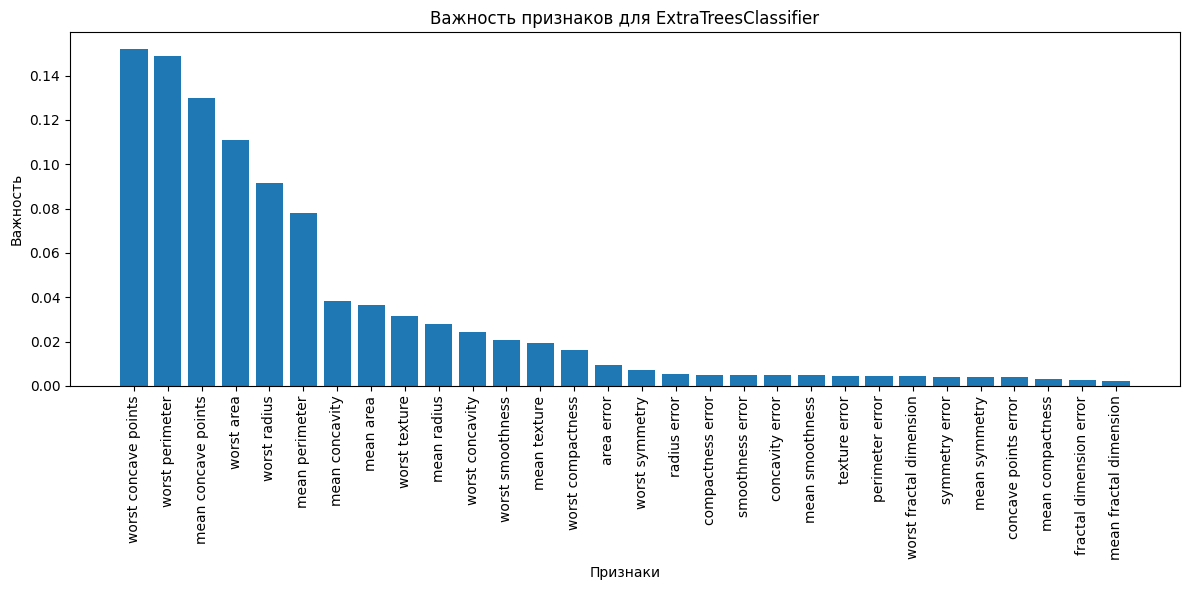

Кросс-валидационные оценки: [0.94736842 0.95614035 0.98245614 0.97368421 0.97345133]
Средняя кросс-валидационная точность: 0.97 ± 0.01


In [1]:
# ExtraTreesClassifier на load_canser_breast
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Загрузка данных (например, набор данных о раке молочной железы)
data = load_breast_cancer()
X = data.data
y = data.target

# Проверка распределения классов
from collections import Counter
print("Распределение классов:", Counter(y))

# Разделение данных на обучающую и тестовую выборки с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Создание и обучение классификатора Extra Trees с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Инициализация ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Точность на обучающей выборке для проверки переобучения
y_train_pred = best_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Визуализация важности признаков
feature_importances = best_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = np.array(data.feature_names)

plt.figure(figsize=(12, 6))
plt.title("Важность признаков для ExtraTreesClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_clf, X, y, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

In [ ]:
# QDA (рак)
# Импортируем необходимые библиотеки
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создание модели QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Обучение модели на обучающем наборе данных
qda_classifier.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = qda_classifier.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Вывод полного отчета
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        42
      benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  2]
 [ 4 68]]


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
# lightgbm
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение классификатора LightGBM
clf = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# KNeighborsClassifier
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Загрузка набора данных
canser = datasets.load_breast_cancer()
X = canser.data  # Берем все признаки
y = canser.target

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Настройка гиперпараметра k с использованием GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Вывод лучшего значения k
print("Лучшее значение k:", knn_cv.best_params_['n_neighbors'])

# Обучение модели с лучшим значением k
knn_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_best.predict(X_test)

# Вывод метрик
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Лучшее значение k: 5
Accuracy: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# DecisionTreeClassifier
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Загрузка и подготовка данных
canser = load_breast_cancer()
X = canser.data #[:27, :22]  # Берем только первые два признака для визуализации
y = canser.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
# Создание модели с ограничением глубины
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9298245614035088
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[37  6]
 [ 2 69]]


In [ ]:
 KNeighborsClassifier дает самую лучшую точность 0.9707602339181286